In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
# import library
import pickle

# open the file of interest, and use pickle loading
higg_file = open ("higgs_100000_pt_250_500.pkl",'rb')
higg_dict = pickle.load(higg_file)

# list all keys of the files
higg_dict.keys()
#data = np.array(new_dict.get('pt'))

qcd_file = open ("qcd_100000_pt_250_500.pkl",'rb')
qcd_dict = pickle.load(qcd_file)

# Problem 1

five sigmae threshold is 154.0


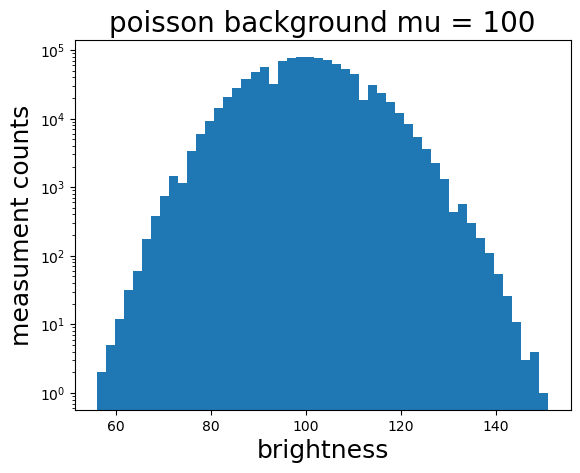

In [3]:
bkgd = stats.poisson.rvs(mu = 100, size=10**6)

plt.hist(bkgd, bins = 50)
plt.yscale('log')

plt.title("poisson background mu = 100", fontsize = 20)
plt.ylabel("measument counts", fontsize = 18)
plt.xlabel("brightness", fontsize = 18)

five_sigma = stats.norm.cdf(5) 
sigma = stats.poisson(mu = 100).ppf(five_sigma)
print("five sigmae threshold is " + str(sigma))

# Problem 2 

190.0


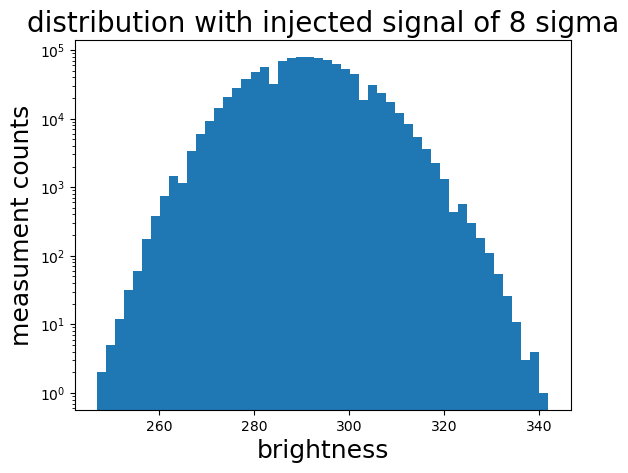

In [4]:
eight_sigma = stats.norm.cdf(8) 


eig_thr = stats.poisson(mu = 100).ppf(eight_sigma)
print(eig_thr)

signal = 190.9
data = bkgd + signal
plt.hist(data, bins = 50)
plt.title("distribution with injected signal of 8 sigma", fontsize = 20)
plt.ylabel("measument counts", fontsize = 18)
plt.xlabel("brightness", fontsize = 18)
plt.yscale('log')

plt.show()

a) The overall shape of the distribution doesn't change as much since we just added a constant signal to the data, resulting in a shift of the histogram and a much brighter observed signal.

b) Since the observed signal is much likely to be stronger than the true signal, the observed signal is biased. The shape of the distribution remains mostly symmetric.

# Problem 3

a) we are simulating all the possible data signal distibution given different theories by injecting singals of a wide range of sigma (from 0 to 30 sigma or more) 

<ipython-input-5-029b2df4fe57>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


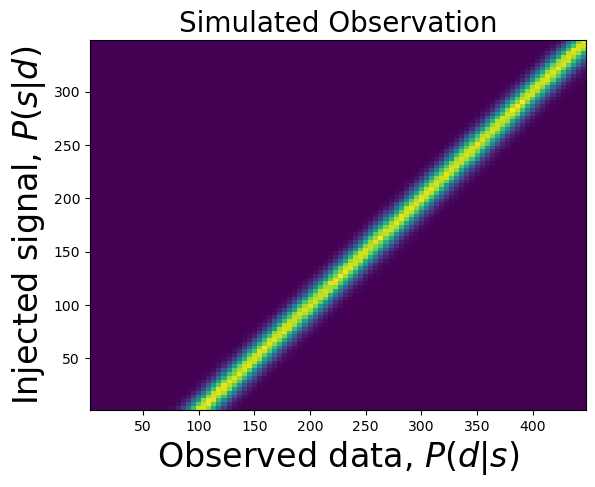

In [5]:
bkgd = stats.poisson.rvs(mu = 100,size=10**6)
signal = np.random.uniform(0, 350, 10**6)

data = bkgd + signal
signaledges = np.linspace(0,350,100)
dataedges = np.linspace(0,450,100)
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)

plt.title("Simulated Observation", fontsize = 20)
plt.ylabel('Injected signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

190.9090909090909


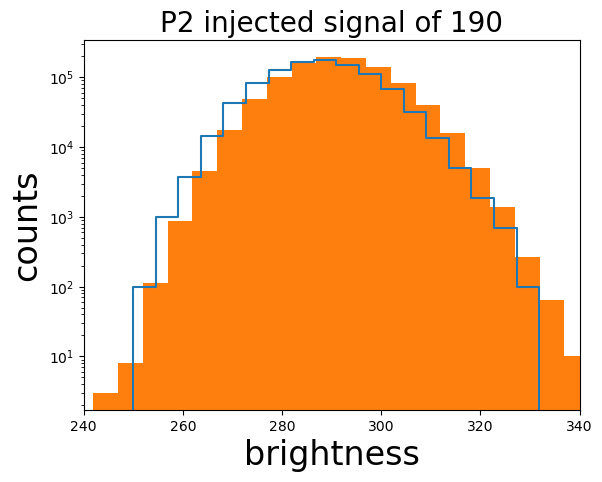

In [6]:
injS = 190
print(signaledges[54])
plt.step(temp[:-1], Psd[:,54]/np.sum(Psd[:,54])*10**6)
plt.yscale('log')
plt.xlim([240,340])
plt.title("H2 slice of injected signal of 190", fontsize = 20)
plt.ylabel('Probability', fontsize = 24)
plt.xlabel('brightness', fontsize = 24)

signal = signaledges[54]
data = bkgd + signal

plt.hist(data, bins = 20)
plt.title("P2 injected signal of 190", fontsize = 20)
plt.ylabel('counts', fontsize = 24)
plt.xlabel('brightness', fontsize = 24)
plt.yscale('log')
plt.show()



b) The shape and range are pretty much the same as the distribution plot frm problem 2

159.0909090909091


(10.0, 110.0)

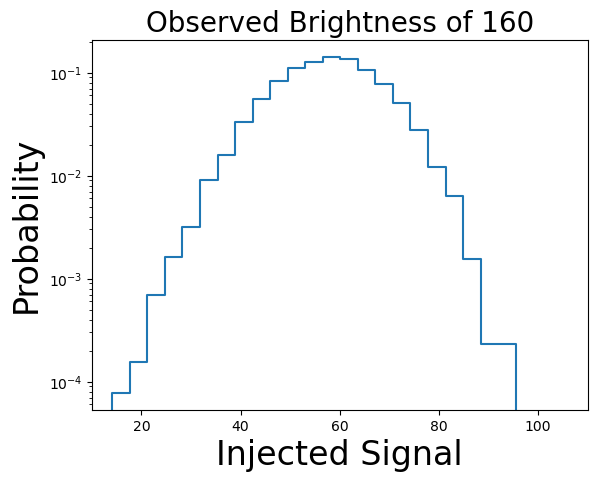

In [10]:
brightness = 160 

print(dataedges[35])
plt.step(temp2[:-1], Psd[35,:]/np.sum(Psd[35,:]))
plt.yscale('log')
plt.title("Observed Brightness of 160", fontsize = 20)
plt.ylabel('Probability', fontsize = 24)
plt.xlabel('Injected Signal', fontsize = 24)
plt.xlim([10,110])


c) The above plot is basically the vertical slice of the selected observed signal, the distribution is normalized, and it shows the probability distribution of the true brightness given the selected observed brightness is 160. 

In [8]:
probability_arr = Psd[35,:]/np.sum(Psd[35,:])
index = []
for x in range(99):
    if(probability_arr[x] != 0):
        index.append([x,probability_arr[x]])
        
sumP = (index[12][1])/2
#print(sumP)

for x in range(30):
    sumP = sumP + index[12+1+x][1]
    print(sumP)
    if (sumP > 0.34):
        print(index[12+x][0])
        break
sumP = (index[12][1])/2
for x in range(30):
    sumP = sumP + index[12-1-x][1]
    print(sumP)
    if (sumP > 0.34):
        print(index[12-x][0])
        break

print(temp2[15:20])
print("upper +34% = "+ str(temp2[19]-temp2[17]))
print("lower -34% = "+ str(temp2[15]-temp2[17]))

0.2067531861983214
0.31337426173453525
0.3910864159154491
19
0.19766086415915446
0.30878924463786134
0.3908532794529064
15
[53.03030303 56.56565657 60.1010101  63.63636364 67.17171717]
upper +34% = 7.070707070707073
lower -34% = -7.070707070707073


d) 1 sigma error is +/- 7.07, so the distribution is symmetric within the 95% confidence level. The observed signal is likely to be stronger than the true signal, making the observed signal biased. This makes sense since the background mean is a non-zero mean, which shifts the centered valuse of the signal. 